I conducted exploratory analyses to determine how states' current publically available electric vehicle (EV) charging stations correlate with their gas usage and wind turbines. Gas usage and wind turbines were researched as a proxy for vehicle use and potential green energy sources.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data on where EV charging stations exist in the US is from: https://maps.nrel.gov/transatlas

In [2]:
electric=pd.read_csv('/Users/ads2137/Dropbox/DI/station_elec_equipments_mv.csv')
#read in data on where EV charging stations exist in the US
#data from https://maps.nrel.gov/transatlas
electric.head()

,FID,station_name,fuel_type_code,status_code,street_address,city,st_prv_code,zip,station_phone,access_days_time,groups_with_access_code,cards_accepted,longitude,latitude
0,station_elec_equipments_mv.fid-32d7c4f9_178e5c...,LADWP - Truesdale Center,ELEC,AVBL,11797 Truesdale St,Sun Valley,CA,91352,NaN,Fleet use only,Private,NaN,-118.3880,34.2483
1,station_elec_equipments_mv.fid-32d7c4f9_178e5c...,Southern California Edison - Rosemead Office B...,ELEC,TMPU,2244 Walnut Grove Ave,Rosemead,CA,91770,NaN,Employee use only,TEMPORARILY UNAVAILABLE (Private),NaN,-118.0810,34.0507
2,station_elec_equipments_mv.fid-32d7c4f9_178e5c...,Los Angeles Convention Center,ELEC,AVBL,1201 S Figueroa St,Los Angeles,CA,90015,213-741-1151,24 hours daily; pay lot,Public,NaN,-118.2714,34.0405
3,station_elec_equipments_mv.fid-32d7c4f9_178e5c...,LADWP - John Ferraro Building,ELEC,AVBL,111 N Hope St,Los Angeles,CA,90012,NaN,For fleet and employee use only,Private,NaN,-118.2486,34.0591
4,station_elec_equipments_mv.fid-32d7c4f9_178e5c...,LADWP - Haynes Power Plant,ELEC,AVBL,6801 E 2nd St,Long Beach,CA,90803,NaN,Fleet use only,Private,NaN,-118.0967,33.7598


Data on highway use of gasoline by state is from:
https://www.fhwa.dot.gov/policyinformation/statistics/2018/mf226.cfm

In [3]:
gas_usage=pd.read_csv('/Users/ads2137/Dropbox/DI/state_gas_use.csv')
#read in highway use of gasoline by state

gas_usage.head()

,STATE,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2012,2013,2014,2015,2015.1,2016,2017,2018,Unnamed: 72,Unnamed: 73
0,Alabama,"464,959","522,435","575,658","632,908","669,398","701,738","759,948","817,714","842,180",...,"2,521,069","2,519,753","2,576,928","2,504,176","2,504,176","2,580,392","2,550,741","2,540,902",NaN,NaN
1,Alaska,0,0,0,0,0,0,0,0,0,...,"267,783","251,692","274,074","243,380","243,380","253,416","247,425","244,389",NaN,NaN
2,Arizona,"187,266","209,747","236,282","270,431","287,090","289,041","321,573","348,685","377,009",...,"2,555,274","2,578,433","2,663,653","2,606,360","2,606,360","2,716,868","2,732,137","2,783,217",NaN,NaN
3,Arkansas,"321,704","348,899","379,263","405,515","416,544","437,240","465,036","496,737","494,126",...,"1,366,706","1,342,104","1,420,837","1,320,737","1,320,737","1,412,534","1,408,054","1,379,415",NaN,NaN
4,California,"2,878,314","3,085,424","3,332,050","3,583,710","3,774,965","3,846,379","4,172,306","4,511,496","4,654,595",...,"14,221,198","14,201,939","14,660,111","14,188,342","14,188,342","14,540,213","14,613,569","14,536,101",NaN,NaN


In [4]:
public_E_states =pd.DataFrame()
public_E_states['state']=electric['st_prv_code'][(electric['status_code']=='AVBL') & (electric['groups_with_access_code']=='Public')]
#filter for publically availably EV charging stations only

In [5]:
public_E_states['code']=electric['status_code'][(electric['status_code']=='AVBL') & (electric['groups_with_access_code']=='Public')]
public_E_states['access']=electric['groups_with_access_code'][(electric['status_code']=='AVBL') & (electric['groups_with_access_code']=='Public')]
#print(public_E_states.info())
#add status code and access to check filtering



For these analyses, only public and currently availably EV charging stations were considered.

In [6]:
public_E_states.head()

,state,code,access
2,CA,AVBL,Public
10,CA,AVBL,Public
12,CA,AVBL,Public
13,CA,AVBL,Public
15,CA,AVBL,Public


In [7]:
#print(public_E_states.value_counts())
# see how states rank in publically available EV charging stations

In [8]:
#print(gas_usage.head(25))

In [9]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
# dictionary to convert state abbrevations to state names


In [10]:
public_E_states['state'].replace(abbrev_us_state,inplace=True)
#print(public_E_states.value_counts())
#convert to state names for consistency

For these analyses only gas usage from 2000-2018 was considered.

In [11]:
gas_usage_2000=pd.DataFrame()
gas_usage_2000=gas_usage[['STATE','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
#filtered dataframe for only more recent years

In [12]:
gas_usage_2000=gas_usage_2000.drop([51,52,53,54])
#print(gas_usage_2000)
#drop nans and Puerto Rico

In [13]:
to_fix=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

for col in to_fix:
    gas_usage_2000[col] = gas_usage_2000[col].str.replace(',','').astype(float)
#clean gas usage and convert to float

In [14]:
train_gas=gas_usage_2000.iloc[0:26]
test_gas=gas_usage_2000.iloc[26:]
#print(test_gas)


In [15]:
public_E_states.rename(columns={"state": "STATE"},inplace=True)


In [16]:
gas_usage_2000["STATE"].replace('Dist. of Col.',"District of Columbia",inplace=True)
#make DC name consistent across both current dataframes

In [17]:
state_counts=public_E_states['STATE'].value_counts()
state_counts=state_counts.drop('Puerto Rico')
#get counts of EV charging station per state
#drop puerto rico from EV charging state counts for now
#print(state_counts)

In [18]:
state_counts=list(state_counts.sort_index())
#print(state_counts)
#get list of state counts of EV charging sorted alphabetically by state for consistency with gas usage dataframe

In [19]:
gas_and_e=gas_usage_2000.copy()
gas_and_e['e_counts']=state_counts

#add EV charging station counts to recent gas_usage data frame for convenience of understanding gas vs EV relationship
gas_and_e.head()

,STATE,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,e_counts
0,Alabama,2378770.0,2382507.0,2541401.0,2446942.0,2545769.0,2545997.0,2537990.0,2573326.0,2510679.0,...,2595316.0,2538696.0,2521069.0,2519753.0,2576928.0,2504176.0,2580392.0,2550741.0,2540902.0,147
1,Alaska,247395.0,235400.0,237008.0,241205.0,279712.0,267821.0,262992.0,267442.0,261376.0,...,265549.0,259821.0,267783.0,251692.0,274074.0,243380.0,253416.0,247425.0,244389.0,33
2,Arizona,2366396.0,2428430.0,2540577.0,2574491.0,2691468.0,2757235.0,2793239.0,2818981.0,2650997.0,...,2585987.0,2563505.0,2555274.0,2578433.0,2663653.0,2606360.0,2716868.0,2732137.0,2783217.0,642
3,Arkansas,1371641.0,1358174.0,1383458.0,1397579.0,1392455.0,1367278.0,1347736.0,1377803.0,1373783.0,...,1408255.0,1372183.0,1366706.0,1342104.0,1420837.0,1320737.0,1412534.0,1408054.0,1379415.0,91
4,California,14378254.0,14691753.0,15385840.0,15358354.0,15579476.0,15614464.0,15509940.0,15402164.0,14787997.0,...,14555037.0,14276055.0,14221198.0,14201939.0,14660111.0,14188342.0,14540213.0,14613569.0,14536101.0,11794


In [20]:
gas_and_e.sort_values(by='e_counts',ascending=False)
#look at data sorted by amount of EV charing stations

,STATE,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,e_counts
4,California,14378254.0,14691753.0,15385840.0,15358354.0,15579476.0,15614464.0,15509940.0,15402164.0,14787997.0,...,14555037.0,14276055.0,14221198.0,14201939.0,14660111.0,14188342.0,14540213.0,14613569.0,14536101.0,11794
32,New York,5522340.0,5536612.0,5617401.0,5717835.0,5652111.0,5566962.0,5602326.0,5561729.0,5474523.0,...,5619055.0,5389479.0,5272365.0,5188623.0,5510992.0,5090797.0,5321827.0,5388111.0,5444276.0,2198
9,Florida,7368472.0,7471117.0,7720436.0,7893121.0,8255164.0,8365589.0,8368522.0,8250698.0,7903075.0,...,7893177.0,7834706.0,7886365.0,7954688.0,8248186.0,8037700.0,8206142.0,8392520.0,8539389.0,1924
43,Texas,10428049.0,10637488.0,11115753.0,11199718.0,11346013.0,11325869.0,11473456.0,11731042.0,11665478.0,...,12000186.0,11921633.0,12143805.0,12322995.0,13254716.0,13254716.0,13701466.0,13796629.0,14045145.0,1809
21,Massachusetts,2713913.0,2720510.0,2785618.0,2791807.0,2824694.0,2782254.0,2763761.0,2854058.0,2758187.0,...,2733501.0,2725178.0,2726824.0,2682202.0,2707913.0,2669169.0,2715141.0,2666514.0,2685219.0,1460
47,Washington,2614703.0,2622633.0,2659936.0,2664999.0,2637226.0,2638736.0,2626518.0,2636390.0,2564282.0,...,2591748.0,2590788.0,2585353.0,2624657.0,2714080.0,2628062.0,2673116.0,2667910.0,2765858.0,1339
10,Georgia,4640345.0,4693703.0,4826786.0,4899436.0,4959100.0,4965789.0,4827210.0,4883089.0,4667051.0,...,4796734.0,4630907.0,4610055.0,4736966.0,4668163.0,4709948.0,4587799.0,4812597.0,4798630.0,1301
5,Colorado,1977730.0,2048664.0,2023069.0,2011767.0,2080962.0,2076744.0,2066183.0,2092476.0,2062000.0,...,2093404.0,2079287.0,2065165.0,2095760.0,2213924.0,2107254.0,2217141.0,2196347.0,2210977.0,1221
25,Missouri,3056280.0,2958880.0,3007814.0,3145591.0,3127336.0,3083921.0,3057674.0,3122420.0,3133624.0,...,3140943.0,3047982.0,3011447.0,2993312.0,3126234.0,2954269.0,3069337.0,3034445.0,3000963.0,928
20,Maryland,2388292.0,2460545.0,2504827.0,2574037.0,2624148.0,2630530.0,2642371.0,2658984.0,2627293.0,...,2621571.0,2602742.0,2657326.0,2744629.0,2715452.0,2711766.0,2630070.0,2599399.0,2587123.0,908


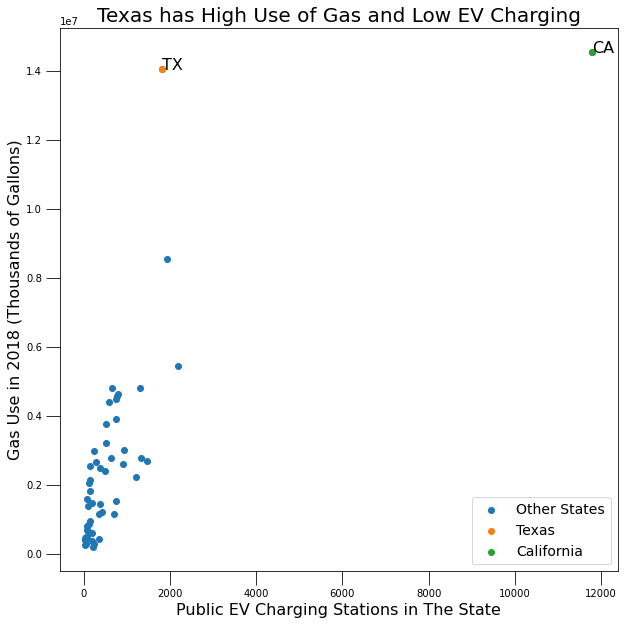

In [21]:
fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.scatter(gas_and_e['e_counts'],gas_and_e['2018'],label='Other States')
ax.scatter(gas_and_e['e_counts'][gas_and_e['STATE']=='Texas'],gas_and_e['2018'][gas_and_e['STATE']=='Texas'],label='Texas')
ax.scatter(gas_and_e['e_counts'][gas_and_e['STATE']=='California'],gas_and_e['2018'][gas_and_e['STATE']=='California'],label='California')


plt.annotate("TX",[gas_and_e['e_counts'][gas_and_e['STATE']=='Texas'],gas_and_e['2018'][gas_and_e['STATE']=='Texas']],size=16)
plt.annotate("CA",[gas_and_e['e_counts'][gas_and_e['STATE']=='California'],gas_and_e['2018'][gas_and_e['STATE']=='California']],size=16)

ax.tick_params(axis='x', size= 14)
ax.tick_params(axis='y', size= 14)

ax.set_xlabel('Public EV Charging Stations in The State',size=16)
ax.set_ylabel('Gas Use in 2018 (Thousands of Gallons)',size=16)

ax.set_title('Texas has High Use of Gas and Low EV Charging',size=20)
ax.legend(prop={'size': 14},loc='lower right')

#fig.savefig('Texas has High Use of Gas and Low EV Charging.pdf')
plt.show()



California is high in EV charging stations and gas use. Texas is also high in gas use but does not have high EV charging. Gas use and EV charging are generally correlated in other states.

In [22]:
gas_usage_2000.sort_values(by='2018',ascending=False)
#sort by highest gas usage in 2018

,STATE,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
4,California,14378254.0,14691753.0,15385840.0,15358354.0,15579476.0,15614464.0,15509940.0,15402164.0,14787997.0,14575049.0,14555037.0,14276055.0,14221198.0,14201939.0,14660111.0,14188342.0,14540213.0,14613569.0,14536101.0
43,Texas,10428049.0,10637488.0,11115753.0,11199718.0,11346013.0,11325869.0,11473456.0,11731042.0,11665478.0,11813364.0,12000186.0,11921633.0,12143805.0,12322995.0,13254716.0,13254716.0,13701466.0,13796629.0,14045145.0
9,Florida,7368472.0,7471117.0,7720436.0,7893121.0,8255164.0,8365589.0,8368522.0,8250698.0,7903075.0,7965595.0,7893177.0,7834706.0,7886365.0,7954688.0,8248186.0,8037700.0,8206142.0,8392520.0,8539389.0
32,New York,5522340.0,5536612.0,5617401.0,5717835.0,5652111.0,5566962.0,5602326.0,5561729.0,5474523.0,5509073.0,5619055.0,5389479.0,5272365.0,5188623.0,5510992.0,5090797.0,5321827.0,5388111.0,5444276.0
35,Ohio,5060358.0,5028276.0,5093599.0,5153371.0,5120596.0,5053460.0,4969756.0,4966280.0,4945142.0,4890709.0,4952455.0,4854761.0,4824293.0,4815395.0,4998767.0,4804289.0,4869710.0,4863364.0,4804259.0
10,Georgia,4640345.0,4693703.0,4826786.0,4899436.0,4959100.0,4965789.0,4827210.0,4883089.0,4667051.0,4786431.0,4796734.0,4630907.0,4610055.0,4736966.0,4668163.0,4709948.0,4587799.0,4812597.0,4798630.0
38,Pennsylvania,4948283.0,5024671.0,5114345.0,5122303.0,5155916.0,5060977.0,4946216.0,5007407.0,4937175.0,5007681.0,5021446.0,4973428.0,4896324.0,4867977.0,4940851.0,4641448.0,4728554.0,4765273.0,4619623.0
13,Illinois,5012000.0,5015217.0,5060607.0,5077060.0,5167835.0,5053245.0,5011306.0,4999558.0,4836836.0,4772810.0,4760179.0,4584599.0,4520233.0,4504374.0,4645212.0,4850518.0,4645051.0,4613983.0,4564577.0
33,North Carolina,4067020.0,4060592.0,4139592.0,4216735.0,4278624.0,4223852.0,4210954.0,4296237.0,4249423.0,4264334.0,4343660.0,4241869.0,4106118.0,4177832.0,4326984.0,4252094.0,4481824.0,4490206.0,4492129.0
22,Michigan,4905204.0,4904689.0,4997313.0,4901953.0,4858390.0,4814731.0,4698481.0,4607576.0,4453565.0,4437325.0,4426295.0,4358852.0,4350116.0,4455916.0,4448249.0,4352982.0,4449726.0,4396083.0,4412120.0


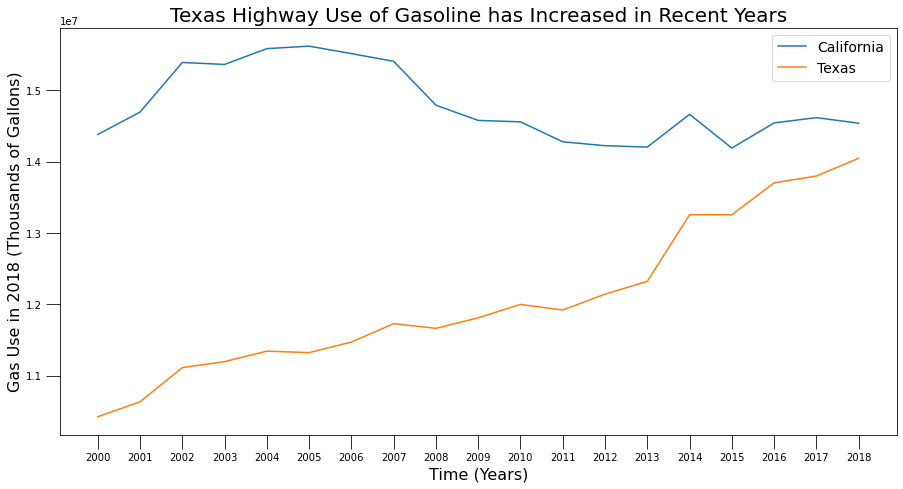

In [23]:
fig,ax=plt.subplots(1,1,figsize=(15,7.5))

ax.plot(gas_usage_2000.set_index('STATE').T['California'],label='California')
ax.plot(gas_usage_2000.set_index('STATE').T['Texas'],label='Texas')
ax.tick_params(axis='x', size= 14)
ax.tick_params(axis='y', size= 14)

ax.set_ylabel('Gas Use in 2018 (Thousands of Gallons)',size=16)
ax.set_xlabel('Time (Years)',size=16)

ax.set_title('Texas Highway Use of Gasoline has Increased in Recent Years',size=20)
ax.legend(prop={'size': 14})
#fig.savefig('Texas Highway Use of Gasoline has Increased in Recent Years.pdf')
plt.show()

Texas has been increasing in gas usage over the last decade while California has not.

In [24]:
turbines=pd.read_csv('/Users/ads2137/Dropbox/DI/uswtdb_v4_0_20210409.csv')
#read in wind turbine data

wind turbine data from https://eerscmap.usgs.gov/uswtdb/data/
Citation:
Hoen, B.D., Diffendorfer, J.E., Rand, J.T., Kramer, L.A., Garrity, C.P., and Hunt, H.E., 2018, 
United States Wind Turbine Database (V4.0, (April 9, 2021): U.S. Geological Survey, American Clean Power Association, and Lawrence Berkeley National Laboratory data release, https://doi.org/10.5066/F7TX3DN0.

In [25]:
turbines.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_rsa,t_ttlh,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3001247,NaN,NaN,5115.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.368187,35.075794
1,3009410,NaN,NaN,5116.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.368088,35.075893
2,3072670,NaN,NaN,5112.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.368408,35.075542
3,3072663,NaN,NaN,5114.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.368202,35.075695
4,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.363762,35.077908


In [26]:
turb_counts=turbines['t_state'].replace(abbrev_us_state,inplace=True)
#change state abbreviations to names

In [27]:
turb_counts=turbines['t_state'].value_counts()
#get wind turbine counts by state

In [28]:
turb_counts=turb_counts.sort_index()
#sort by state name, not all states included in this data

In [29]:
print(len(turb_counts))
#confirming not all states included

46


In [30]:
print(turb_counts.index)
#confirming not all states included

Index(['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Guam', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')


In [31]:
turb_counts_new=pd.DataFrame()
turb_counts_new['STATE']=list(turb_counts.index)
#making dataframe of turbine counts sorted by state name

In [32]:
turb_counts_new['t_counts']=list(turb_counts)
#added turbmine counts

In [33]:
gas_E_T=pd.merge(gas_and_e, turb_counts_new, on="STATE")
#merging to get data that has information on gas, EV charging, and turbines on a subset of states

In [34]:
# fig,ax=plt.subplots(1,1,figsize=(10,10))

# ax.scatter(gas_E_T['t_counts'],gas_E_T['2018'],label='Other States')
# ax.scatter(gas_E_T['t_counts'][gas_E_T['STATE']=='Texas'],gas_E_T['2018'][gas_E_T['STATE']=='Texas'],label='Texas')
# ax.scatter(gas_E_T['t_counts'][gas_E_T['STATE']=='California'],gas_E_T['2018'][gas_E_T['STATE']=='California'],label='California')


# plt.annotate("TX",[gas_E_T['t_counts'][gas_E_T['STATE']=='Texas'],gas_E_T['2018'][gas_E_T['STATE']=='Texas']],size=16)
# plt.annotate("CA",[gas_E_T['t_counts'][gas_E_T['STATE']=='California'],gas_E_T['2018'][gas_E_T['STATE']=='California']],size=16)

# ax.tick_params(axis='x', size= 14)
# ax.tick_params(axis='y', size= 14)

# ax.set_xlabel('Number of Wind Turbines in the State',size=16)
# ax.set_ylabel('Gas Use in 2018 (Thousands of Gallons)',size=16)

# ax.set_title('TX Exceeds CA in Wind Turbines',size=20)
# ax.legend(prop={'size': 14},loc='lower right')
# plt.show()
#fig.savefig('TX Exceeds CA in Wind Turbines.pdf')
#Texas and California switch places when it comes to high wind turbines

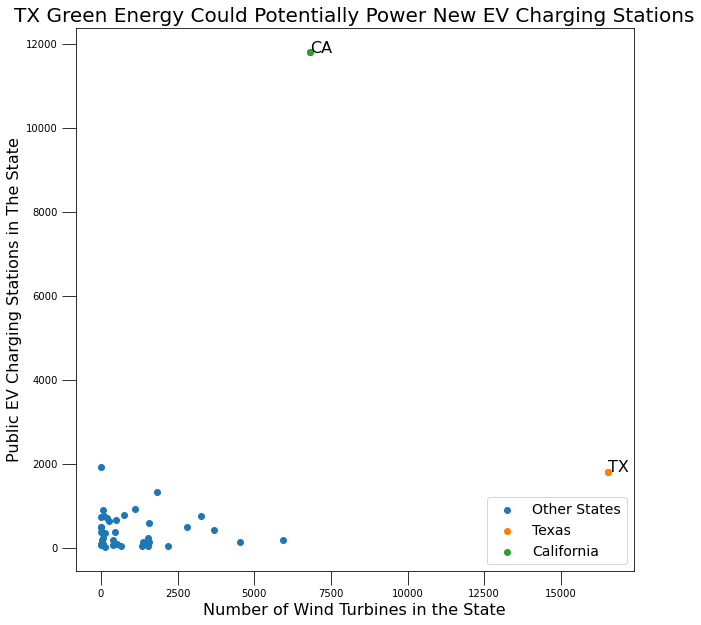

In [35]:
fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.scatter(gas_E_T['t_counts'],gas_E_T['e_counts'],label='Other States')
ax.scatter(gas_E_T['t_counts'][gas_E_T['STATE']=='Texas'],gas_E_T['e_counts'][gas_E_T['STATE']=='Texas'],label='Texas')
ax.scatter(gas_E_T['t_counts'][gas_E_T['STATE']=='California'],gas_E_T['e_counts'][gas_E_T['STATE']=='California'],label='California')


plt.annotate("TX",[gas_E_T['t_counts'][gas_E_T['STATE']=='Texas'],gas_E_T['e_counts'][gas_E_T['STATE']=='Texas']],size=16)
plt.annotate("CA",[gas_E_T['t_counts'][gas_E_T['STATE']=='California'],gas_E_T['e_counts'][gas_E_T['STATE']=='California']],size=16)

ax.tick_params(axis='x', size= 14)
ax.tick_params(axis='y', size= 14)

ax.set_xlabel('Number of Wind Turbines in the State',size=16)
ax.set_ylabel('Public EV Charging Stations in The State',size=16)

ax.set_title('TX Green Energy Could Potentially Power New EV Charging Stations',size=20)
ax.legend(prop={'size': 14},loc='lower right')
#fig.savefig('TX Green Energy Could Potentially Power New EV Charging Stations.pdf')
plt.show()
#plotting number of EV charging stations versus turbine number

Texas has the highest number of wind turbines, even exceeding that of California.
The disparity between wind turbine number and EV charging station number in Texas suggests that wind turbines may be a means to provide green energy to power EV charging stations.

In [36]:
texas_turb_locs=pd.DataFrame()
texas_turb_locs['xlong']=turbines['xlong'][turbines['t_state']=='Texas']
#get texas turbine longitudes

In [37]:
texas_turb_locs['ylat']=turbines['ylat'][turbines['t_state']=='Texas']
#get texas turbine latitudes
#print(texas_turb_locs)

In [38]:
texas_e_locs=pd.DataFrame()
texas_e_locs['xlong']=electric['longitude'][(electric['st_prv_code']=='TX') & (electric['status_code']=='AVBL') & (electric['groups_with_access_code']=='Public')]
#get publically available EV chargin station longitudes

In [39]:
texas_e_locs['ylat']=electric['latitude'][(electric['st_prv_code']=='TX') & (electric['status_code']=='AVBL') & (electric['groups_with_access_code']=='Public')]
#get publically available EV chargin station latitudes

In [40]:
texas_e_locs.to_csv(r'/Users/ads2137/Dropbox/DI/texas_e_locs.csv')

In [41]:
texas_turb_locs.to_csv(r'/Users/ads2137/Dropbox/DI/texas_turb_locs.csv')

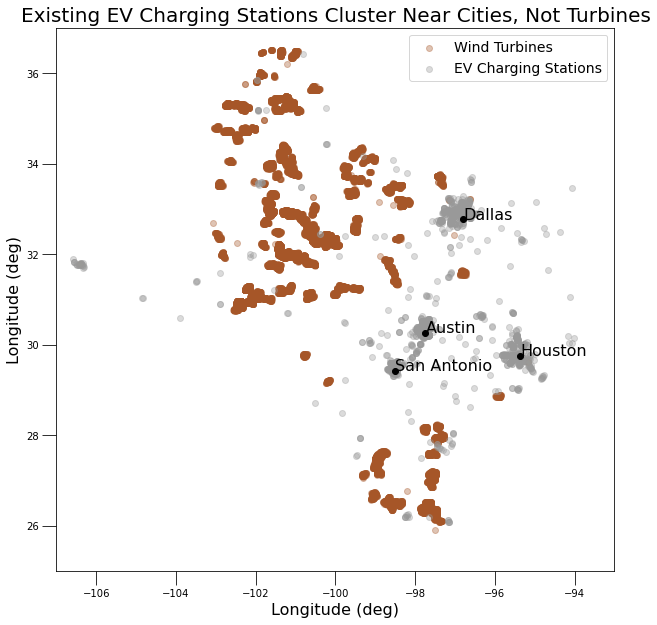

In [42]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.scatter(texas_turb_locs['xlong'],texas_turb_locs['ylat'], c='#a65628',alpha=0.35,label='Wind Turbines')
ax.scatter(texas_e_locs['xlong'],texas_e_locs['ylat'],c='#999999',alpha=0.35,label='EV Charging Stations')

ax.scatter(-95.3698,29.7604,c='k')
ax.scatter(-96.7970,32.7767,c='k')
ax.scatter(-98.4936,29.4241,c='k')
ax.scatter(-97.7431,30.2672,c='k')
#ax.scatter(,)


plt.annotate('Houston',(-95.3698,29.7604),size=16)
plt.annotate('Dallas',(-96.7970,32.7767),size=16)
plt.annotate('San Antonio',(-98.4936,29.4241),size=16)
plt.annotate('Austin',(-97.7431,30.2672),size=16)
#plt.annotate("",size=16)



ax.legend(prop={'size': 14})
ax.tick_params(axis='x', size= 14)
ax.tick_params(axis='y', size= 14)

ax.set_xlabel('Longitude (deg)',size=16)
ax.set_ylabel('Longitude (deg)',size=16)
ax.set_xlim(-107,-93)
ax.set_ylim(25,37)
ax.set_title('Existing EV Charging Stations Cluster Near Cities, Not Turbines',size=20)
#fig.savefig('Existing EV Charging Stations Do Not Cluster near Wind Turbines.pdf')
plt.show()
#plotting locations of turbines and EV stations in texas
# = ['#377eb8', '#ff7f00', '#4daf4a',
 #                 '#f781bf', '#a65628', '#984ea3',
  #                '#999999', '#e41a1c', '#dede00']

In [43]:
texas_e_locs['label']='EVC'
texas_turb_locs['label']='turb'
texas_locs=pd.concat([texas_e_locs,texas_turb_locs])
#combine into one dataframe with labels to distinguish the two


In [44]:
truckstops=pd.read_csv('/Users/ads2137/Dropbox/DI/Truck_Stop_Parking.csv')
#read in truck stop data
truckstops.head()

,X,Y,OBJECTID,State_numb,NHS_Rest_S,Highway_Ro,Mile_Post,Municipali,County,State,Latitude,Longitude,Number_of
0,-88.393032,30.477238,1,1,Grand Bay Welcome Center,I-10 EB,0.485,Grand Bay,Mobile,AL,30.477238,-88.393032,90
1,-87.418285,30.575718,2,1,Baldwin County Welcome Center,I-10 WB,65.8,Seminole,Baldwin,AL,30.575718,-87.418285,27
2,-85.407686,31.006808,3,1,Houston County Welcome Center,US-231 NB / SB,0.706,Cottonwood,Houston,AL,31.006808,-85.407686,8
3,-86.296196,31.090454,4,1,Covington County Rest Area,US-331 NB / SB,8.002,Florala,Covington,AL,31.090454,-86.296196,5
4,-87.114501,31.336613,5,1,Conecuh County Rest Area (NB),I-65 NB,84.208,Evergreen,Conecuh,AL,31.336613,-87.114501,22


Truck Stop data is from https://data-usdot.opendata.arcgis.com/datasets/truck-stop-parking/data?geometry=-156.331%2C24.870%2C-35.042%2C49.055

In [45]:
texas_truckstop_locs=pd.DataFrame()
texas_truckstop_locs['xlong']=truckstops['Longitude'][truckstops['State']=='TX']
texas_truckstop_locs['ylat']=truckstops['Latitude'][truckstops['State']=='TX']

#get texas truck stop locations
texas_locs=pd.concat([texas_e_locs,texas_turb_locs])
texas_truckstop_locs['label']='truckstop'
texas_locs=pd.concat([texas_locs,texas_truckstop_locs])
#add to overall location dataframe for convenience

In [46]:
print(len(texas_truckstop_locs))

66


In [47]:
texas_truckstop_locs.to_csv(r'/Users/ads2137/Dropbox/DI/texas_truckstop_locs.csv')

In [48]:
google_route35_gas=pd.read_csv('/Users/ads2137/Dropbox/DI/google_gas_route35.csv')

In [49]:
route35_gas=pd.DataFrame()
route35_gas['Name']=google_route35_gas.squeeze().str.extract(r'place/(.*[a-zA-Z])/data').squeeze().str.replace('+',' ')
route35_gas['xlong']=google_route35_gas.squeeze().str.extract(r'!4d(-?\d+\.?\d+)').astype(float)
route35_gas['ylat']=google_route35_gas.squeeze().str.extract(r'!3d(\d+\.?\d+)').astype(float)
route35_gas.head()

,Name,xlong,ylat
0,Chevron,-96.804799,32.712849
1,Valero Gas Station,-97.717014,30.360016
2,NaN,-97.410620,31.080798
3,NaN,-96.821273,32.514572
4,Chevron,-96.765313,32.777096


In [50]:
route35_gas.to_csv(r'/Users/ads2137/Dropbox/DI/route35_gas.csv')

In [51]:
google_route20_gas=pd.read_csv('/Users/ads2137/Dropbox/DI/google_gas_route20.csv')

In [52]:
route20_gas=pd.DataFrame()
route20_gas['Name']=google_route20_gas.squeeze().str.extract(r'place/(.*[a-zA-Z])/data').squeeze().str.replace('+',' ')
route20_gas['xlong']=google_route20_gas.squeeze().str.extract(r'!4d(-?\d+\.?\d+)').astype(float)
route20_gas['ylat']=google_route20_gas.squeeze().str.extract(r'!3d(\d+\.?\d+)').astype(float)
route20_gas.head()

,Name,xlong,ylat
0,Exxon,-96.856662,32.761936
1,Chevron,-97.632707,32.733665
2,Chevron Santo,-98.111354,32.605995
3,West Texas Gas,-101.368523,32.276049
4,West Texas Gas,-99.501157,32.413418


In [53]:
route20_gas.to_csv(r'/Users/ads2137/Dropbox/DI/route20_gas.csv')

In [54]:
# fig,ax=plt.subplots(1,1,figsize=(10,10))
# ax.scatter(texas_e_locs['xlong'],texas_e_locs['ylat'],c='#999999',label='Existing EV Charging Stations')
# ax.scatter(texas_turb_locs['xlong'],texas_turb_locs['ylat'],  c='#a65628',label='Existing Wind Turbines')
# ax.scatter(texas_truckstop_locs['xlong'],texas_truckstop_locs['ylat'],c='#dede00',label='Existing Truck Stops')


# ax.legend(prop={'size': 14})
# ax.tick_params(axis='x', size= 14)
# ax.tick_params(axis='y', size= 14)

# ax.set_xlabel('Longitude (deg)',size=16)
# ax.set_ylabel('Longitude (deg)',size=16)
# ax.set_xlim(-107,-93)
# ax.set_ylim(25,37)
# ax.set_title('Truck Stops are more Disperse than Wind Turbines',size=20)
# #fig.savefig('Truck Stops are more Disperse than Wind Turbines.pdf')
# plt.show()


#plot data again truck stop locations

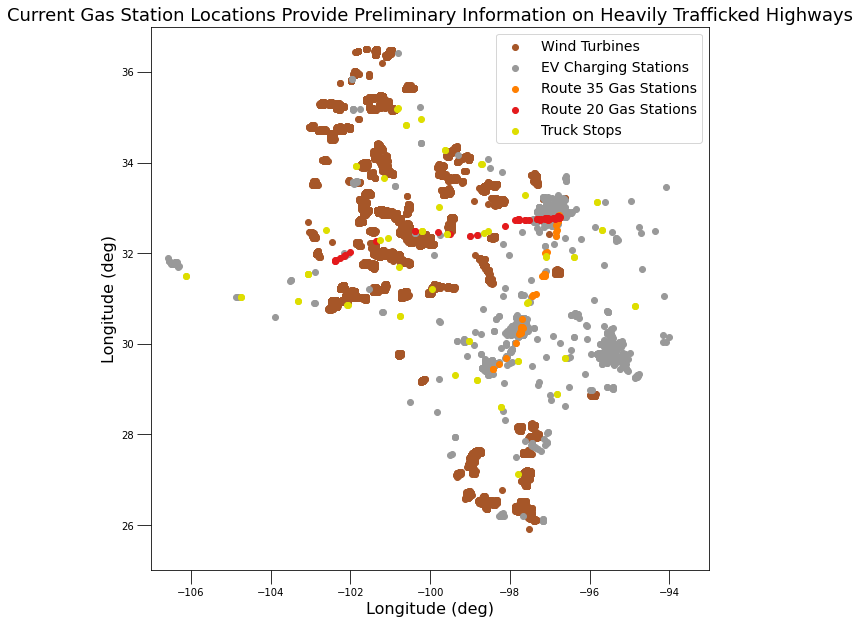

In [55]:
fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.scatter(texas_turb_locs['xlong'],texas_turb_locs['ylat'],  c='#a65628',label='Wind Turbines')
ax.scatter(texas_e_locs['xlong'],texas_e_locs['ylat'],c='#999999',label='EV Charging Stations')
ax.scatter(route35_gas['xlong'],route35_gas['ylat'],c='#ff7f00',label='Route 35 Gas Stations')
ax.scatter(route20_gas['xlong'],route20_gas['ylat'],c='#e41a1c',label='Route 20 Gas Stations')
ax.scatter(texas_truckstop_locs['xlong'],texas_truckstop_locs['ylat'],c='#dede00',label='Truck Stops')



ax.legend(prop={'size': 14})
ax.tick_params(axis='x', size= 14)
ax.tick_params(axis='y', size= 14) 
ax.set_xlabel('Longitude (deg)',size=16)
ax.set_ylabel('Longitude (deg)',size=16)
ax.set_xlim(-107,-93)
ax.set_ylim(25,37)
ax.set_title('Current Gas Station Locations Provide Preliminary Information on Heavily Trafficked Highways',size=18)
#fig.savefig('Truck Stops are more Disperse than Wind Turbines.pdf')
plt.show()


#plot data again truck stop locations

According to the Texas Department of Transportation, Route 35, between Dallas and San Antonio, has the highest traffic flow. Route 20, between Odessa and Dallas, appears to have the second highest traffic flow.
I scraped the locations of all the gas stations along these two routes from Google Maps.
I also include truck stop data from the US Department of Transportation to provide more information on where parking is currently available for commercial vehicles. 
Truck stops along highways are less frequent than gas stations.

https://ftp.txdot.gov/pub/txdot-info/tpp/traffic_counts/flowband/2017-traffic.pdf

https://ftp.txdot.gov/pub/txdot-info/tpp/traffic_counts/flowband/2017-truck.pdf